Melbourne Airbnb Price Prediction

Author: Marko Mikulic 1011/18

In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pickle
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime
import itertools



In [31]:
data = pd.read_csv("cleansed_listings_dec18.csv")

c:\users\marko mikulic\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22895 non-null  int64  
 1   listing_url                       22895 non-null  object 
 2   scrape_id                         22895 non-null  float64
 3   last_scraped                      22895 non-null  object 
 4   name                              22892 non-null  object 
 5   summary                           22199 non-null  object 
 6   space                             16844 non-null  object 
 7   description                       22563 non-null  object 
 8   neighborhood_overview             14424 non-null  object 
 9   notes                             11546 non-null  object 
 10  transit                           14943 non-null  object 
 11  access                            15168 non-null  object 
 12  inte

In [33]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,17,0.15
3,15246,https://www.airbnb.com/rooms/15246,2.018120e+13,12/7/2018,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",A simple self service breakfast is available –...,...,9.0,9.0,f,NaN,f,moderate,f,f,3,0.30
4,16760,https://www.airbnb.com/rooms/16760,2.018120e+13,12/7/2018,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,...,10.0,9.0,f,NaN,f,moderate,f,f,1,0.74


In [34]:
data = data.dropna(thresh=len(data) - 2290, axis=1) # removing all columns with more than 10% (~2290) nan values

In [35]:
id_type_columns = ['id','listing_url','scrape_id','last_scraped','name','summary','description','picture_url','host_id','host_url','host_name','host_thumbnail_url','host_picture_url','amenities',"country_code","country","calendar_updated",'has_availability','requires_license']

In [36]:
data = data.drop(columns=id_type_columns) #removing features that are not related to price, for instance, host_id and scrape_id

In [37]:
data.columns

Index(['host_since', 'host_location', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'city', 'suburb', 'state', 'zipcode', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

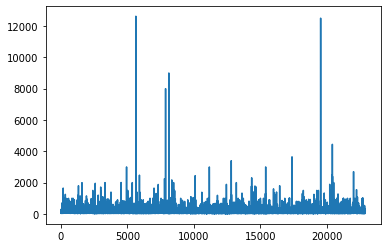

In [38]:
# Distribution of prices

plt.plot(data['price'])
plt.show()

In [39]:
# Removing all the listings with price higher than $1000 or with price of $0, in order to remove outliers.

data = data[data['price']<=1000] 
data = data[data['price']>0]

In [40]:
data["host_verifications"]

0                            ['email', 'phone', 'reviews']
1        ['email', 'phone', 'reviews', 'jumio', 'govern...
2        ['email', 'phone', 'google', 'reviews', 'jumio...
3        ['email', 'phone', 'facebook', 'reviews', 'jum...
4        ['email', 'phone', 'facebook', 'reviews', 'jum...
                               ...                        
22890                                   ['email', 'phone']
22891                        ['email', 'phone', 'reviews']
22892                        ['email', 'phone', 'reviews']
22893    ['email', 'phone', 'reviews', 'offline_governm...
22894    ['email', 'phone', 'facebook', 'jumio', 'gover...
Name: host_verifications, Length: 22777, dtype: object

In [41]:
data = data.dropna() # removing listings with no value

In [42]:
# transform host_verifications, from a list of verficitation options to the number of verification options
def host_verification_transformation(x):
    return len(x)

data["host_verifications"] = data["host_verifications"].transform(host_verification_transformation)

In [43]:
data["host_verifications"]

0         29
1         55
2         79
3        106
4         92
        ... 
22890     18
22891     29
22892     29
22893    100
22894     56
Name: host_verifications, Length: 22501, dtype: int64

In [44]:
# transform host_since, from a date to the number of days between hist_since and the date the data was extracted.

date_format = "%m/%d/%Y"

base_date = datetime.strptime("10/10/2019", date_format)

def host_since_transformation(s):
    host_date = datetime.strptime(s, date_format)
    time_in_days = base_date - host_date
    return (time_in_days.days)

data["host_since"] = data["host_since"].transform(host_since_transformation)

In [45]:
data["host_since"]

0        3702
1        3676
2        3631
3        3598
4        3579
         ... 
22890     309
22891     755
22892     878
22893    1820
22894    1550
Name: host_since, Length: 22501, dtype: int64

In [46]:
data.dtypes

host_since                            int64
host_location                        object
host_is_superhost                    object
host_verifications                    int64
host_has_profile_pic                 object
host_identity_verified               object
street                               object
city                                 object
suburb                               object
state                                object
zipcode                              object
smart_location                       object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                           

In [47]:
# Creating dataframe with object type values in order to construct one-hot encoding for categorical features.

obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

object_columns = list(obj_df.columns)


In [48]:
object_columns

['host_location',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'city',
 'suburb',
 'state',
 'zipcode',
 'smart_location',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'calendar_last_scraped',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [49]:
obj_df

,host_location,host_is_superhost,host_has_profile_pic,host_identity_verified,street,city,suburb,state,zipcode,smart_location,is_location_exact,property_type,room_type,bed_type,calendar_last_scraped,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,AU,f,f,f,"Bulleen, VIC, Australia",Manningham,Bulleen,VIC,3105,"Bulleen, Australia",f,House,Private room,Real Bed,12/7/2018,f,strict_14_with_grace_period,f,f
1,"Melbourne, Victoria, Australia",f,t,t,"Brunswick East, VIC, Australia",Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",t,Apartment,Private room,Futon,12/7/2018,t,moderate,t,t
2,"Melbourne, Victoria, Australia",t,t,t,"St Kilda, VIC, Australia",Port Phillip,St Kilda,VIC,3182,"St Kilda, Australia",t,Apartment,Entire home/apt,Real Bed,12/7/2018,f,strict_14_with_grace_period,f,f
3,"Melbourne, Victoria, Australia",f,t,t,"Thornbury, VIC, Australia",Darebin,Thornbury,VIC,3071,"Thornbury, Australia",t,House,Private room,Real Bed,12/7/2018,f,moderate,f,f
4,"Saint Kilda East, Victoria, Australia",f,t,t,"St Kilda East, VIC, Australia",Port Phillip,St Kilda East,VIC,3183,"St Kilda East, Australia",t,House,Private room,Real Bed,12/7/2018,f,moderate,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"Carlton, Victoria, Australia",f,t,f,"Carlton, VIC, Australia",Melbourne,Carlton,VIC,3053.0,"Carlton, Australia",t,Apartment,Private room,Real Bed,12/7/2018,t,flexible,f,f
22891,"Melton, Victoria, Australia",f,t,f,"Melton South, VIC, Australia",Melton,Melton South,VIC,3338.0,"Melton South, Australia",t,House,Entire home/apt,Real Bed,12/7/2018,t,flexible,f,f
22892,China,f,t,f,"Glen Waverley, VIC, Australia",Monash,Glen Waverley,VIC,3150.0,"Glen Waverley, Australia",f,Guesthouse,Private room,Real Bed,12/7/2018,t,flexible,f,f
22893,"Melbourne, Victoria, Australia",f,t,f,"Southbank, VIC, Australia",Melbourne,Southbank,VIC,3006.0,"Southbank, Australia",t,Apartment,Entire home/apt,Real Bed,12/7/2018,t,moderate,f,f


In [50]:
obj_df.columns 

Index(['host_location', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'city', 'suburb', 'state',
       'zipcode', 'smart_location', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'calendar_last_scraped', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [51]:
pd.get_dummies(obj_df)

,host_location_10 Gnoorong st Warnett Victoria Australia,host_location_12 Yarkon Way Point Cook 3030 VIC,host_location_51 cuttlefish circuit tarneit 3029,host_location_AU,host_location_AUS,host_location_AUSTRALIA,"host_location_Abbotsford, British Columbia, Canada","host_location_Abbotsford, Victoria, Australia","host_location_Aberfeldie, Victoria, Australia","host_location_Addis Ababa, Addis Ababa, Ethiopia",...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
22891,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
22892,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
22893,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [52]:
# Observe that there are above 3000 newly created features, in order to decrease the number of features, remove all 
# features that would add more than 100 new features.

for a in obj_df.columns:
    if obj_df[a].unique().size > 100:
        obj_df = obj_df.drop(columns = [a])
        print (a)
        

host_location
street
suburb
zipcode
smart_location


In [53]:
obj_df = pd.get_dummies(obj_df)

obj_df

,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,city_Banyule,city_Bayside,city_Boroondara,city_Brimbank,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
22891,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
22892,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
22893,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [54]:
data = data.drop(columns = object_columns) #removing object columns that have generated new "dummy" features

In [55]:
# Join numerical features with newly generated features, and create target dataframe y

df = pd.concat([data, obj_df], axis=1, join="inner")
df
y = df['price']
df = df.drop(columns = ['price'])

In [56]:
#splitting the dataset into 70%, 15% and 15% entries for training, valiation and test sets respectively.

x_train_val, x_test, y_train_val, y_test = model_selection.train_test_split(df, y, test_size = 0.15, random_state = 7)

x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train_val, y_train_val, test_size = 0.176, random_state = 7)

To prevent overfitting, we perform feature selection by LASSO

In [57]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [58]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.5)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [59]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..............model__alpha=0.1;, score=-7431.520 total time=   4.0s
[CV 2/5] END ..............model__alpha=0.1;, score=-7381.793 total time=  12.8s
[CV 3/5] END .............model__alpha=0.1;, score=-15563.793 total time=   4.0s
[CV 4/5] END ..............model__alpha=0.1;, score=-7758.034 total time=  19.0s
[CV 5/5] END ..............model__alpha=0.1;, score=-7914.976 total time=  15.7s
[CV 1/5] END ..............model__alpha=0.6;, score=-7436.502 total time=   0.9s
[CV 2/5] END ..............model__alpha=0.6;, score=-7357.561 total time=   1.0s
[CV 3/5] END ..............model__alpha=0.6;, score=-6619.156 total time=   0.9s
[CV 4/5] END ..............model__alpha=0.6;, score=-7767.203 total time=   0.8s
[CV 5/5] END ..............model__alpha=0.6;, score=-7970.018 total time=   0.9s
[CV 1/5] END ..............model__alpha=1.1;, score=-7456.184 total time=   0.5s
[CV 2/5] END ..............model__alpha=1.1;, s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6])},
             scoring='neg_mean_squared_error', verbose=3)

In [60]:
search.best_params_

{'model__alpha': 0.6}

In [61]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients

array([ 4.68941715e+00, -7.94422951e+00,  0.00000000e+00, -0.00000000e+00,
        1.60579625e+01,  1.98878112e+01,  3.04117261e+01,  0.00000000e+00,
        1.36490640e+00,  6.30069031e-01, -1.06928699e+00,  0.00000000e+00,
        7.61511960e+00,  1.45612981e+00, -0.00000000e+00,  6.73269580e+00,
       -8.63616809e+00,  4.81507171e-01, -2.08868487e+00,  5.77127167e-16,
        8.32569967e-02, -4.27074103e-15, -6.12297329e-01,  0.00000000e+00,
       -1.72634472e+00,  5.52917635e+00,  6.69101869e-01, -2.18666862e+00,
        6.56164835e-01, -0.00000000e+00, -4.97372015e-01, -1.01827965e-01,
       -3.25276679e-01, -2.46400688e+00,  0.00000000e+00, -1.81320845e+00,
       -6.12137422e-01, -2.02496918e+00, -0.00000000e+00, -1.32395911e+00,
       -1.35828540e+00,  1.27166267e+01, -1.12412298e+00, -1.93570747e+00,
        0.00000000e+00, -2.07152677e-01,  0.00000000e+00,  1.03491732e+01,
        7.48780841e+00, -3.11634287e+00, -1.40798530e+00, -4.03945814e+00,
        7.97686485e+00,  

In [62]:
# Removing features with no importance

importance = np.abs(coefficients)
importance > 0

features = df.columns

new_features = list(np.array(features)[importance > 0])
new_features # features that will be use in model generation

['host_since',
 'host_verifications',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'availability_30',
 'availability_60',
 'availability_365',
 'number_of_reviews',
 'calculated_host_listings_count',
 'host_is_superhost_f',
 'host_is_superhost_t',
 'host_has_profile_pic_f',
 'host_has_profile_pic_t',
 'host_identity_verified_f',
 'city_Banyule',
 'city_Bayside',
 'city_Boroondara',
 'city_Brimbank',
 'city_Cardinia',
 'city_Darebin',
 'city_Frankston',
 'city_Glen Eira',
 'city_Greater Dandenong',
 'city_Hume',
 'city_Kingston',
 'city_Knox',
 'city_Maribyrnong',
 'city_Maroondah',
 'city_Melbourne',
 'city_Melton',
 'city_Monash',
 'city_Moreland',
 'city_Port Phillip',
 'city_Stonnington',
 'city_Whitehorse',
 'city_Whittlesea',
 'city_Wyndham',
 'city_Yarra',
 'city_Yarra Ranges',
 'state_Australia',
 'state_Brunswick VIC 3056',
 'state_Melbourne',
 'state_VIC 3008',
 'state_Vic',
 'state_Victoria',
 'state_Wantirna South VIC 3

In [63]:
# removing non-important features

x_train_sel = x_train[new_features]
x_val_sel = x_val[new_features]
x_test_sel = x_test[new_features]

Linear model

In [145]:
lin_model = linear_model.LinearRegression()

In [146]:
# Training linear model
lin_model.fit(x_train, y_train)

LinearRegression()

In [160]:
# Loading the model created above, skip if the model was trained

model_filename = 'models/lin_model.model'    

with open(model_filename, 'rb') as pickle_file:
    lin_model = pickle.load(pickle_file)

In [161]:
y_predicted = lin_model.predict(x_test)

In [162]:
# Using mean squared error to evaluate the model

lin_model_MSE = metrics.mean_squared_error(y_test, y_predicted)
lin_model_MSE 

7058.96005486269

In [163]:
# Using r squared to evaluate the model

lin_model_r2 = metrics.r2_score(y_test, y_predicted)
lin_model_r2 

0.450036716683194

In [150]:
lin_model_sel = linear_model.LinearRegression()

In [151]:
# Training linear model with selected features

lin_model_sel.fit(x_train_sel, y_train)

LinearRegression()

In [165]:
# Loading the model created above, skip if the model was trained

model_filename = 'models/lin_model_sel.model'    

with open(model_filename, 'rb') as pickle_file:
    lin_model_sel = pickle.load(pickle_file)

In [166]:
y_predicted_sel = lin_model_sel.predict(x_test_sel)

In [167]:
# Using mean squared error to evaluate the model

lin_model_MSE_sel = metrics.mean_squared_error(y_test, y_predicted_sel)
lin_model_MSE_sel 

7075.046683140843

In [154]:
# Using r squared to evaluate the model

lin_model_r2_sel = metrics.r2_score(y_test, y_predicted_sel)
lin_model_r2_sel

0.4487834081453088

Ridge Regression

In [74]:
ridge_model = Ridge(alpha=1.2) # using alpha = 1.2 as alpha = 1 gave poorly condition matrix

In [75]:
# Training ridge model

ridge_model.fit(x_train, y_train)

Ridge(alpha=1.2)

In [168]:
# Loading the model created above, skip if the model was trained

model_filename = 'models/ridge_model.model'    

with open(model_filename, 'rb') as pickle_file:
    ridge_model = pickle.load(pickle_file)

In [169]:
y_predicted = ridge_model.predict(x_test)

In [170]:
# Using mean squared error to evaluate the model

ridge_model_MSE = metrics.mean_squared_error(y_test, y_predicted)
ridge_model_MSE 

7047.004476493758

In [78]:
# Using r squared to evaluate the model

ridge_model_r2 = metrics.r2_score(y_test, y_predicted)
ridge_model_r2 

0.45096817529503297

In [79]:
ridge_model_sel = Ridge(alpha=1.2) # using alpha = 1.2 as alpha = 1 gave poorly condition matrix

In [80]:
# Training ridge model

ridge_model_sel.fit(x_train_sel, y_train)

Ridge(alpha=1.2)

In [171]:
# Loading the model created above, skip if the model was trained

model_filename = 'models/ridge_model_sel.model'    

with open(model_filename, 'rb') as pickle_file:
    ridge_model_sel = pickle.load(pickle_file)

In [82]:
y_predicted_sel = ridge_model_sel.predict(x_test_sel)

In [83]:
# Using mean squared error to evaluate the model

ridge_model_MSE_sel = metrics.mean_squared_error(y_test, y_predicted_sel)
ridge_model_MSE_sel 

7062.836209557275

In [84]:
# Using r squared to evaluate the model

ridge_model_r2_sel = metrics.r2_score(y_test, y_predicted_sel)
ridge_model_r2_sel

0.4497347256326838

 Random Forest

In [85]:
# Creating random forest model with n_estimators=70 and max_depth=20 parameters.

model_forest = ensemble.RandomForestClassifier(n_estimators=70, max_depth=20, random_state=7)

In [86]:
# Training random forest model.

model_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=70, random_state=7)

In [87]:
y_predicted = model_forest.predict(x_test)

In [88]:
# Using mean squared error to evaluate the model

forest_model_MSE = metrics.mean_squared_error(y_test, y_predicted)
forest_model_MSE 

6975.393661137441

In [89]:
# Using r squared to evaluate the model

forest_model_r2 = metrics.r2_score(y_test, y_predicted)
forest_model_r2

0.45654737093125475

Gradient Boosting

In [98]:
# Creating default gradien boosting model.

reg = GradientBoostingRegressor(random_state=7)

In [99]:
reg.fit(x_train, y_train)

GradientBoostingRegressor(random_state=7)

In [100]:
y_predicted = reg.predict(x_val)

In [102]:
metrics.r2_score(y_val, y_predicted)

0.5584259656440499

In [97]:
# Tuning the n_estimator parameter, possible values being: 10, 50, 100, 500, 1000; with criterium being maximizing r2 score.

r2 = -1

n_trees = [10, 50, 100, 500, 1000]
for n in n_trees:
    model = GradientBoostingRegressor(n_estimators=n, random_state=7)
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_val)
    if metrics.r2_score(y_val, y_predicted) > r2:
        r2 = metrics.r2_score(y_val, y_predicted)
        n_best = n
    print(n)
    
    

10
50
100
500
1000


In [103]:
# n_estimators = 1000 provides best results
print(r2)
print(n_best)

0.6017391293421989
1000


In [104]:
# Tuning the learning_rate parameter, possible values being: 0.01, 0.1, 1.0; with criterium being maximizing r2 score.

r2 = -1

for i in [0.01, 0.1, 1.0]:
    model = GradientBoostingRegressor(learning_rate=i, n_estimators=n_best, random_state=7)
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_val)
    if metrics.r2_score(y_val, y_predicted) > r2:
        r2 = metrics.r2_score(y_val, y_predicted)
        i_best = i
    print(i)


0.01
0.1
1.0


In [105]:
# learning_rate = 0.1 provides best results, which happens to be defult value for that parameter
print(i_best)
print(r2)

0.1
0.6017391293421989


In [106]:
# Tuning the max_depth parameter, possible values being: 3 and 6; with criterium being maximizing r2 score.

r2 = -1

for i in [3, 6]:
    model = GradientBoostingRegressor(max_depth=i, n_estimators=n_best, random_state=7)
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_val)
    if metrics.r2_score(y_val, y_predicted) > r2:
        r2 = metrics.r2_score(y_val, y_predicted)
        i_best = i
    print(i)

3
6


In [107]:
# max_depth = 6 provides best results, which happens to be defult value for that parameter
print(i_best)
print(r2)

6
0.6184884052243631


In [108]:
# Using parameters which create best the model using gradient boosting.

model_Gradient_Boosting = GradientBoostingRegressor(max_depth=i_best, n_estimators=n_best, random_state=7)
model_Gradient_Boosting.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=1000, random_state=7)

In [174]:
# Loading the model created above, skip if the model was trained

model_filename = 'models/model_Gradient_Boosting.model'    

with open(model_filename, 'rb') as pickle_file:
    model_Gradient_Boosting = pickle.load(pickle_file)

In [175]:
y_predicted = model_Gradient_Boosting.predict(x_test)

In [176]:
# Using r squared to evaluate the model

gradient_boosting_r2 = metrics.r2_score(y_test, y_predicted)
gradient_boosting_r2

0.6323667955251089

In [177]:
# Using mean squared error to evaluate the model

gradient_boosting_model_MSE = metrics.mean_squared_error(y_test, y_predicted)
gradient_boosting_model_MSE

4718.6933818171165

Comparing models

In [119]:
Evaluations = {"Model" : ["Linear Regression", "Linear Regression Lasso selection", "Ridge Regression", "Ridge Regression Lasso selection", "Random Forest", "Gradient Boosting"], 
               "Mean squared error" : [lin_model_MSE, lin_model_MSE_sel, ridge_model_MSE, ridge_model_MSE_sel, forest_model_MSE, gradient_boosting_model_MSE],
               "R squared" : [lin_model_r2, lin_model_r2_sel, ridge_model_r2, ridge_model_r2_sel, forest_model_r2,gradient_boosting_r2]}

Evaluations_df = pd.DataFrame(Evaluations)

In [121]:
# Gradient boosting provides the best results!

Evaluations_df

,Model,Mean squared error,R squared
0,Linear Regression,7058.960055,0.450037
1,Linear Regression Lasso selection,7075.046683,0.448783
2,Ridge Regression,7047.004476,0.450968
3,Ridge Regression Lasso selection,7062.836210,0.449735
4,Random Forest,6975.393661,0.456547
5,Gradient Boosting,4718.693382,0.632367


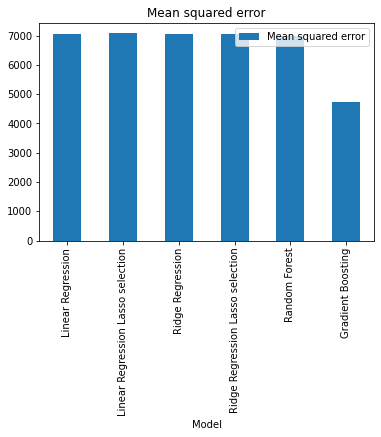

In [131]:
# Graphical representation of mean squared error per model considered.

Evaluations_df.plot(kind='bar',x='Model',y='Mean squared error', title = "Mean squared error")
plt.show()

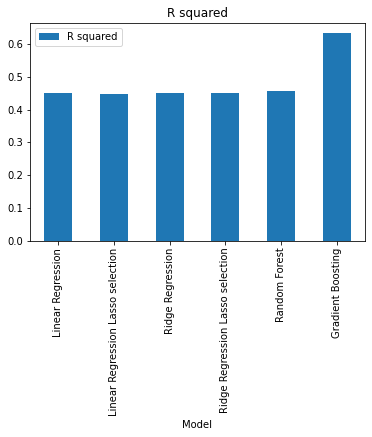

In [132]:
# Graphical representation of R squared per model considered.

Evaluations_df.plot(kind='bar',x='Model',y='R squared', title = "R squared")
plt.show()

In [158]:
# Creating model files in case it is needed to load them


model_filename = 'models/lin_model.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(lin_model, pickle_file)
    
model_filename = 'models/lin_model_sel.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(lin_model_sel, pickle_file)
    
model_filename = 'models/ridge_model.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(ridge_model, pickle_file)
    
model_filename = 'models/ridge_model_sel.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(ridge_model_sel, pickle_file)
    
model_filename = 'models/model_Gradient_Boosting.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(model_Gradient_Boosting, pickle_file)